In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
import os
import random
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import torch
from torchtext.data import Field, TabularDataset, BucketIterator, Iterator
import torch.nn as nn
from transformers import BertTokenizer, BertForSequenceClassification
import torch.optim as optim

sys.path.append('../src/')
from model import SarcasmDetector

In [3]:
detector = SarcasmDetector(tokenizer_do_lc=False)

There is/are 1 GPU(s) available.
GPU GeForce RTX 2070 SUPER will be used.


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [4]:
detector.model_criterion

BCELoss()

In [5]:
detector.tokenize_data('train.csv', 'validate.csv', 'test.csv', batch_size=16, max_seq_len=128)

Created train, validation, and test datasets with max_seq_len=128
Created iterators with batch_size=16


In [6]:
detector.train(num_epochs=15, lr=8e-7)

Epoch [1/15], Step [133/3990], Train Loss: 0.6692, Valid Loss: 0.7711
../data/output/foo.pt
0.7711071583131949
Model saved to ==> ../data/output/model.pt
Model saved to ==> ../data/output/metrics.pt
Epoch [1/15], Step [266/3990], Train Loss: 0.6475, Valid Loss: 0.7365
../data/output/foo.pt
0.7365104605754217
Model saved to ==> ../data/output/model.pt
Model saved to ==> ../data/output/metrics.pt
Epoch [2/15], Step [399/3990], Train Loss: 0.6821, Valid Loss: 0.7734
Epoch [2/15], Step [532/3990], Train Loss: 0.6434, Valid Loss: 0.6800
../data/output/foo.pt
0.6800134306152662
Model saved to ==> ../data/output/model.pt
Model saved to ==> ../data/output/metrics.pt
Epoch [3/15], Step [665/3990], Train Loss: 0.6588, Valid Loss: 0.7608
Epoch [3/15], Step [798/3990], Train Loss: 0.6174, Valid Loss: 0.6194
../data/output/foo.pt
0.6193712837994099
Model saved to ==> ../data/output/model.pt
Model saved to ==> ../data/output/metrics.pt
Epoch [4/15], Step [931/3990], Train Loss: 0.6298, Valid Loss: 0

Model loaded from ../data/output.


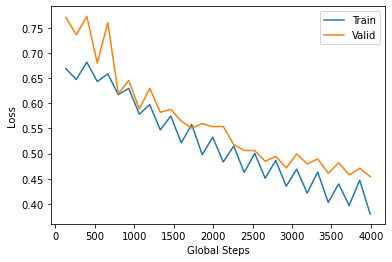

In [7]:
train_loss_list, valid_loss_list, global_steps_list = detector.load_metrics(Path('../data/output/') / 'metrics.pt')
plt.plot(global_steps_list, train_loss_list, label='Train')
plt.plot(global_steps_list, valid_loss_list, label='Valid')
plt.xlabel('Global Steps')
plt.ylabel('Loss')
plt.legend()
plt.show() 